In [1]:
import numpy as np

In [2]:
import pandas as pd
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

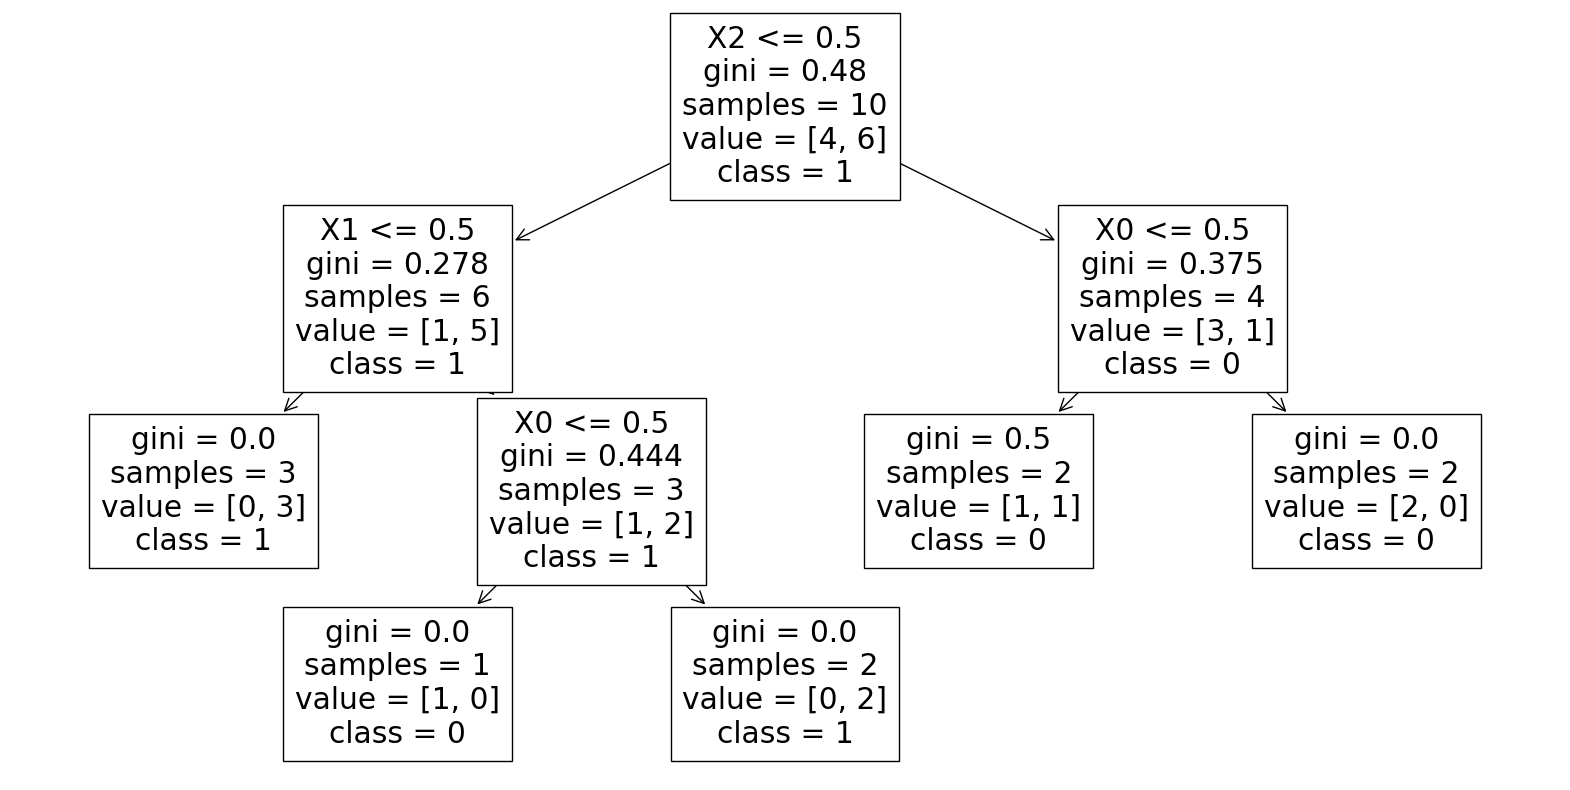

In [22]:
# Re-creating the dataset from the image provided
data = {
    'X0': [0,1,1,0,0,0,1,0,0,1],
    'X1': [1,0,1,0,0,0,1,0,0,1],
    'X2': [0,1,0,1,1,0,1,0,0,0],
    'Y':  [0,0,1,1,0,1,0,1,1,1]
}
df = pd.DataFrame(data)

# Separating features and target variable
X = df[['X0', 'X1', 'X2']]
y = df['Y']

# Creating the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Training the decision tree classifier
dt_classifier.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, feature_names=['X0', 'X1', 'X2'], class_names=['0', '1'])
plt.show()

In [3]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Re-creating the dataset from the image provided
X = [[0.5], [1.3], [2.3], [3.0], [6.5], [7.7], [8.0], [8.3], [9.0], [9.5]]
y = [1, -1, -1, -1, -1, 1, 1, 1, 1, -1]

# Initialize the decision tree classifier with no depth limit
dt_classifier_full = DecisionTreeClassifier(random_state=0)

# Training the decision tree classifier
dt_classifier_full.fit(X, y)

# Predicting the labels of the training data
y_pred_full = dt_classifier_full.predict(X)

# Calculating the training error
training_error_full = 1 - accuracy_score(y, y_pred_full)

# Initialize leave-one-out cross-validation
loo = LeaveOneOut()

# Variable to accumulate the errors
loo_errors = 0

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(X):
    X_train, X_test = [X[index] for index in train_index], [X[index] for index in test_index]
    y_train, y_test = [y[index] for index in train_index], [y[index] for index in test_index]
    
    # Train the classifier on the train set
    dt_classifier_full.fit(X_train, y_train)
    
    # Predict the test set
    y_pred_test = dt_classifier_full.predict(X_test)
    
    # Accumulate the errors
    loo_errors += 1 if y_pred_test != y_test else 0

# Calculate leave-one-out cross-validation error rate
loo_error_rate = loo_errors / len(X)

# Initialize the decision stump classifier (depth-one decision tree)
dt_classifier_stump = DecisionTreeClassifier(random_state=0, max_depth=1)

# Training the decision stump classifier
dt_classifier_stump.fit(X, y)

# Predicting the labels of the training data with the decision stump
y_pred_stump = dt_classifier_stump.predict(X)

# Calculating the training error for the decision stump
training_error_stump = 1 - accuracy_score(y, y_pred_stump)

# Variable to accumulate the errors for the decision stump
loo_errors_stump = 0

# Perform leave-one-out cross-validation for the decision stump
for train_index, test_index in loo.split(X):
    X_train, X_test = [X[index] for index in train_index], [X[index] for index in test_index]
    y_train, y_test = [y[index] for index in train_index], [y[index] for index in test_index]
    
    # Train the classifier on the train set
    dt_classifier_stump.fit(X_train, y_train)
    
    # Predict the test set
    y_pred_test = dt_classifier_stump.predict(X_test)
    
    # Accumulate the errors
    loo_errors_stump += 1 if y_pred_test != y_test else 0

# Calculate leave-one-out cross-validation error rate for the decision stump
loo_error_rate_stump = loo_errors_stump / len(X)

(training_error_full, loo_error_rate, training_error_stump, loo_error_rate_stump)


(0.0, 0.5, 0.19999999999999996, 0.3)

In [4]:
import math
def ent(p):
    entropy = p * math.log2(1/p) + (1 - p) * math.log2(1/(1 - p))
    return entropy

In [13]:
0.97 - ((6/10)*ent(1/6) + (4/10)*ent(3/4))

0.2554752972273344

In [5]:
ent(1/3)

0.9182958340544893